In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

df = pd.read_csv(r'D:\\Personal\\Projects\\Project 3 - ML Model\\Data\\auto-mpg.csv', na_values="?", comment='\t', sep=' '
                    , skipinitialspace=True, names=cols)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
df.shape

(398, 8)

In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model year       13
origin            3
dtype: int64

In [8]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [9]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

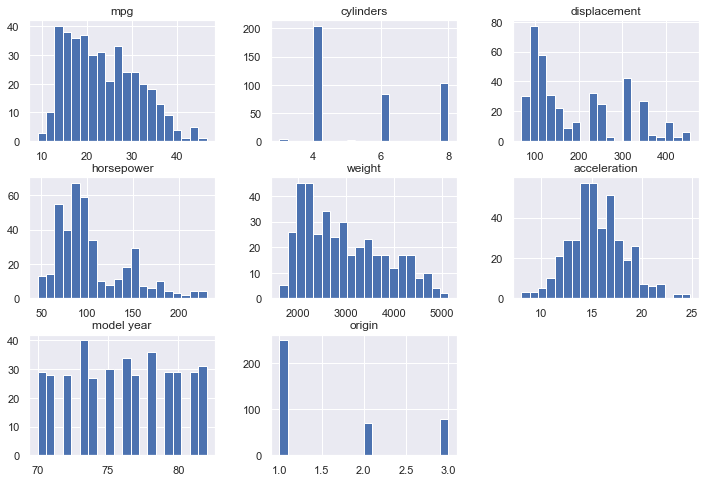

In [10]:
df.hist(figsize=(12,8),bins=20)
plt.show()

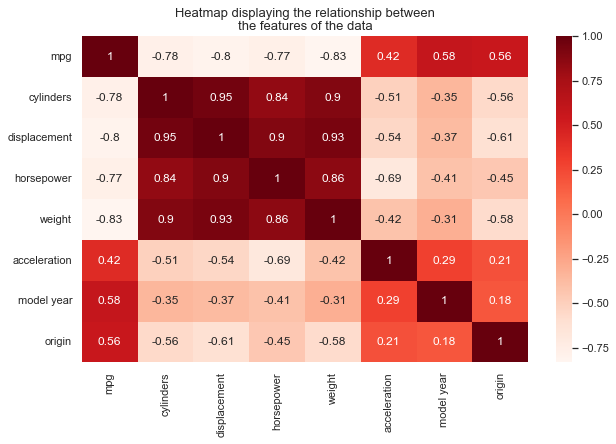

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',
         fontsize=13)
plt.show()

In [12]:
newdf = df.drop(['cylinders','displacement','weight'],axis=1)

In [13]:
print('Correlation between mpg and the remaining variables:\n\n{}'.format(newdf.corr().mpg))

Correlation between mpg and the remaining variables:

mpg             1.000000
horsepower     -0.773453
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64


In [14]:
x = newdf.drop('mpg', axis=1)
y = newdf.mpg

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=0)

In [16]:
model = LinearRegression()  # initialize the LinearRegression model
model.fit(x_train,y_train)  # we fit the model with the training data

LinearRegression()

In [17]:
linear_pred = model.predict(x_test)

print('Train score: {}\n'.format(model.score(x_train,y_train)))

print('Test score: {}\n'.format(model.score(x_test,y_test)))


Train score: 0.7567917541483092

Test score: 0.7321721898926257



In [18]:
from sklearn.metrics import r2_score,mean_squared_error

print('Overall model accuracy: {}\n'.format(r2_score(y_test,linear_pred)))

print('Mean Squared Error: {}'.format(mean_squared_error(y_test,linear_pred)))

Overall model accuracy: 0.7321721898926257

Mean Squared Error: 17.11470128891205


In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2)

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}             

In [ ]:

tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search

tree_search.fit(xtrain,ytrain)   # fit the model


In [ ]:
# we now fit a RandomForestRegressor model and perform a grid search to find the best 
# parameters
forest = RandomForestRegressor()

# we add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]

forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,     # initialize the search
                                  n_iter=50)

forest_search.fit(xtrain,ytrain)  # fit the model